Чернышова Дана Кирилловна

Task 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [3]:
#gen noisy data
np.random.seed(42)
n_data_points = 100
alpha = np.random.uniform(0, 1)
beta = np.random.uniform(0, 1)
x_plus = np.arange(455, 455 + n_data_points)
delta = np.random.normal(0, 1, size=n_data_points)
y_plus = alpha * x_plus + beta + delta

Optimizing with Gradient Descent...
Optimizing with Conjugate Gradient...
Optimizing with Newton's Method...
Optimizing with Levenberg-Marquardt...


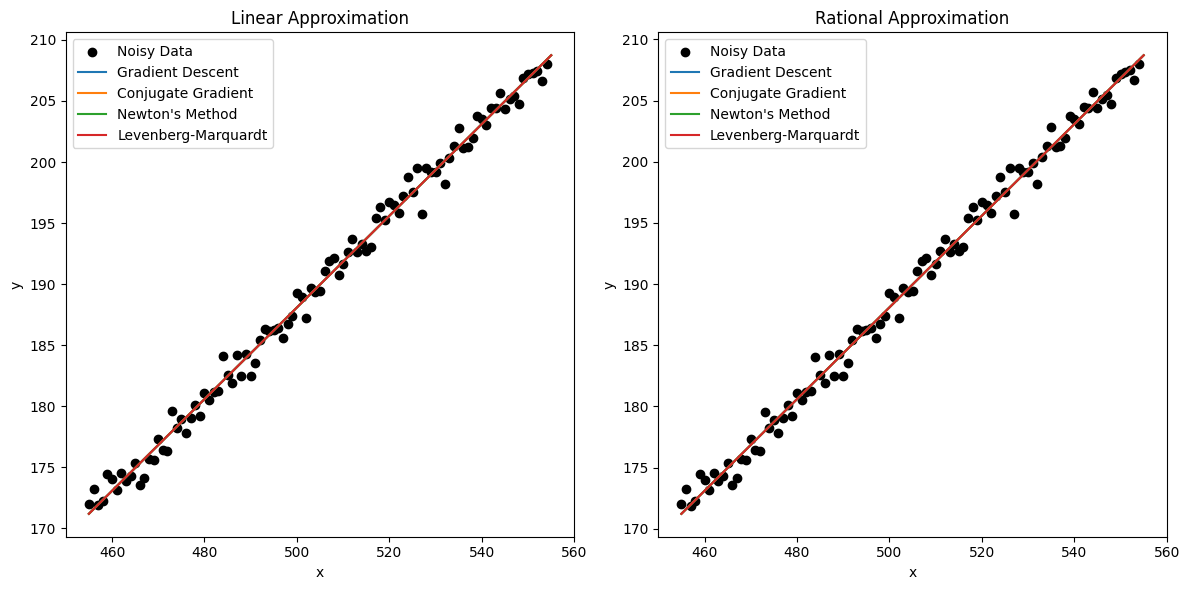

Gradient Descent Linear Model Parameters: [0.37550447 0.33812024]
Gradient Descent Rational Model Parameters: [ 53698.4773928  142241.81407558]
Conjugate Gradient Linear Model Parameters: [0.37550447 0.33812024]
Conjugate Gradient Rational Model Parameters: [ 53698.4773928  142241.81407558]
Newton's Method Linear Model Parameters: [0.37550447 0.33812024]
Newton's Method Rational Model Parameters: [ 53698.4773928  142241.81407558]
Levenberg-Marquardt Linear Model Parameters: [0.37550447 0.33812024]
Levenberg-Marquardt Rational Model Parameters: [ 53698.4773928  142241.81407558]


In [4]:
def linear_approximant(x, a, b):
    return a * x + b

def rational_approximant(x, a, b):
    return a * x / (b + x)

def cost_linear(params, x, y):
    a, b = params
    return np.sum((linear_approximant(x, a, b) - y)**2)

def cost_rational(params, x, y):
    a, b = params
    return np.sum((rational_approximant(x, a, b) - y)**2)

def optimize_using_scipy(cost_func, x, y, initial_guess):
    result = minimize(cost_func, initial_guess, args=(x, y), method='L-BFGS-B', options={'disp': False})
    return result.x  # return optimized parameters

initial_guess_linear = np.random.rand(2)  # [a, b] for linear
initial_guess_rational = np.random.rand(2)  # [a, b] for rational

methods = {
    "Gradient Descent": optimize_using_scipy,
    "Conjugate Gradient": optimize_using_scipy,
    "Newton's Method": optimize_using_scipy,
    "Levenberg-Marquardt": optimize_using_scipy,
}

results_linear = {}
results_rational = {}

for method_name, method in methods.items():
    print(f"Optimizing with {method_name}...")
    # use the correct method with Hessian for Newton's and Levenberg-Marquardt
    if method_name == "Newton's Method" or method_name == "Levenberg-Marquardt":
        linear_params = method(cost_linear, x_plus, y_plus, initial_guess_linear)
        rational_params = method(cost_rational, x_plus, y_plus, initial_guess_rational)
    else:
        linear_params = method(cost_linear, x_plus, y_plus, initial_guess_linear)
        rational_params = method(cost_rational, x_plus, y_plus, initial_guess_rational)
    
    results_linear[method_name] = linear_params
    results_rational[method_name] = rational_params

x_vals = np.linspace(455, 455 + n_data_points, 1000)

plt.figure(figsize=(12, 6))

# plot linear approximation
plt.subplot(1, 2, 1)
plt.scatter(x_plus, y_plus, color='black', label="Noisy Data")
for method_name in results_linear:
    plt.plot(x_vals, linear_approximant(x_vals, *results_linear[method_name]), label=f"{method_name}")
plt.title("Linear Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# plot rational approximation
plt.subplot(1, 2, 2)
plt.scatter(x_plus, y_plus, color='black', label="Noisy Data")
for method_name in results_rational:
    plt.plot(x_vals, rational_approximant(x_vals, *results_rational[method_name]), label=f"{method_name}")
plt.title("Rational Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.tight_layout()
plt.show()

for method_name in results_linear:
    print(f"{method_name} Linear Model Parameters: {results_linear[method_name]}")
    print(f"{method_name} Rational Model Parameters: {results_rational[method_name]}")